# Data processing and feature engineering
This section includes changing existing pieces of data and manipulating them in a way to produce beneficial results. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("edited housing data.csv")

In [3]:
df

,Price,Bedrooms,Bathrooms,Parkings,Type,Estimated Size/ft,Levels,Garage,Average household income,Total population,lat,lng
0,1540180.0,2.0,2.0,1.0,Condo Apt,1299.5,Apartment,Undergrnd,122917.0,14768.0,43.680467,-79.430436
1,896000.0,2.0,2.0,1.0,Condo Apt,949.5,Apartment,Undergrnd,62171.0,4089.0,43.769796,-79.369430
2,705600.0,1.0,1.0,1.0,Condo Apt,749.5,Apartment,Undergrnd,76677.0,37644.0,43.657599,-79.383640
3,801000.0,2.0,1.0,1.0,Condo Apt,849.5,Apartment,Attached,168492.0,5488.0,43.640357,-79.542820
4,2355000.0,3.0,4.0,3.0,Detached,NaN,2-Storey,None,187227.0,6526.0,43.724902,-79.418350
...,...,...,...,...,...,...,...,...,...,...,...,...
16176,1300000.0,2.0,2.0,1.0,Condo Apt,1299.5,Apartment,Undergrnd,122917.0,14768.0,43.678743,-79.440532
16177,575000.0,1.0,1.0,0.0,Condo Apt,749.5,Apartment,Undergrnd,81702.0,6801.0,43.639029,-79.415923
16178,430000.0,1.0,1.0,1.0,Condo Apt,549.5,Apartment,Undergrnd,57144.0,17602.0,43.679358,-79.470675
16179,580000.0,1.0,2.0,0.0,Condo Apt,549.5,Apartment,None,85636.0,23133.0,43.707888,-79.392802


In [4]:
df_copy = df

<AxesSubplot: xlabel='Estimated Size/ft', ylabel='Price'>

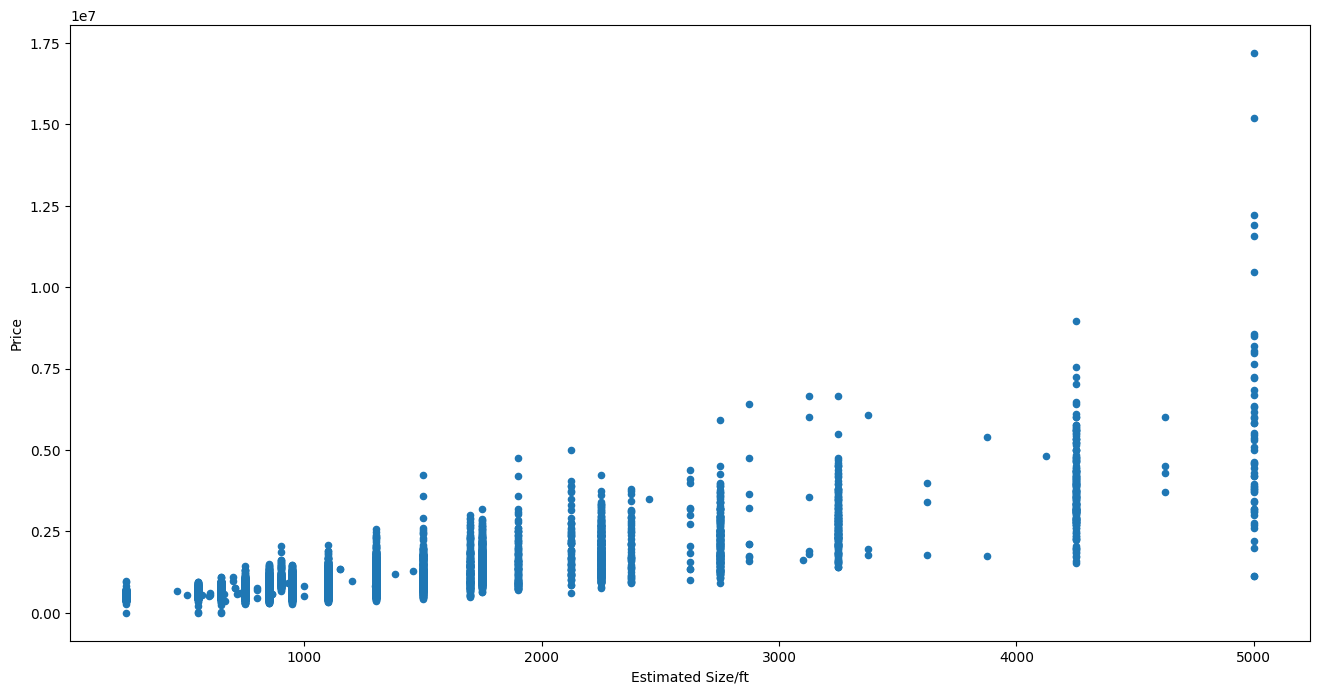

In [5]:
df_copy.plot.scatter(x= 'Estimated Size/ft', y= 'Price', figsize=(16,8))

In [6]:
data1 = df_copy.loc[(df_copy['Price'] >= 0) &
               (df_copy['Price'] <= 200000)]

In [7]:
data1

,Price,Bedrooms,Bathrooms,Parkings,Type,Estimated Size/ft,Levels,Garage,Average household income,Total population,lat,lng
1781,18025.0,1.0,1.0,0.0,Condo Apt,649.5,Apartment,Undergrnd,76406.0,7260.0,43.642748,-79.410892
2112,2250.0,1.0,1.0,1.0,Condo Apt,649.5,Apartment,Undergrnd,44289.0,9789.0,43.734734,-79.482271
4843,2250.0,1.0,1.0,1.0,Condo Apt,549.5,Apartment,Undergrnd,62171.0,4089.0,43.769571,-79.368640
12585,2150.0,1.0,1.0,0.0,Condo Apt,249.5,Apartment,Undergrnd,97340.0,10121.0,43.611505,-79.489437
14576,14075.0,1.0,1.0,0.0,Condo Apt,549.5,Apartment,Undergrnd,75678.0,5341.0,43.653603,-79.363895


In [8]:
x = 0
size_list = []
while x < 3800000:
    price_range = df_copy.loc[(df_copy['Price'] >= x) & (df_copy['Price'] <= (x + 200000))]
    mean_size = price_range['Estimated Size/ft'].mean()
    size_list.append(mean_size)
    x += 200000
           

In [9]:
size_list

[529.5,
 753.0336538461538,
 666.7307514983863,
 779.1131174277726,
 1041.4944341372914,
 1288.3601092896174,
 1493.81220657277,
 1667.5314769975787,
 1917.7367491166078,
 2074.4320652173915,
 2303.467857142857,
 2403.796875,
 2529.0539215686276,
 2747.641025641026,
 2916.804054054054,
 3364.1964285714284,
 3288.521739130435,
 3359.060606060606,
 3503.8552631578946]

# Size and price link
There's clearly a link between the average size of a house and it's price. I decided to fill the null size values by replacing them with the mean average size of the price range that they fall in. 

In [10]:
def replace_NA(size, price):
    i = 0
    j = 0
    if size == 'N/A':
        if price >= 3800000:
            return 3877.39
        else:    
            while (i + 200000) < 3800000:
                if i <= price <= (i + 200000):
                    return size_list[j]   
                else:            
                    i += 200000
                    j += 1           
    else:
        return size

In [11]:
df_copy

,Price,Bedrooms,Bathrooms,Parkings,Type,Estimated Size/ft,Levels,Garage,Average household income,Total population,lat,lng
0,1540180.0,2.0,2.0,1.0,Condo Apt,1299.5,Apartment,Undergrnd,122917.0,14768.0,43.680467,-79.430436
1,896000.0,2.0,2.0,1.0,Condo Apt,949.5,Apartment,Undergrnd,62171.0,4089.0,43.769796,-79.369430
2,705600.0,1.0,1.0,1.0,Condo Apt,749.5,Apartment,Undergrnd,76677.0,37644.0,43.657599,-79.383640
3,801000.0,2.0,1.0,1.0,Condo Apt,849.5,Apartment,Attached,168492.0,5488.0,43.640357,-79.542820
4,2355000.0,3.0,4.0,3.0,Detached,NaN,2-Storey,None,187227.0,6526.0,43.724902,-79.418350
...,...,...,...,...,...,...,...,...,...,...,...,...
16176,1300000.0,2.0,2.0,1.0,Condo Apt,1299.5,Apartment,Undergrnd,122917.0,14768.0,43.678743,-79.440532
16177,575000.0,1.0,1.0,0.0,Condo Apt,749.5,Apartment,Undergrnd,81702.0,6801.0,43.639029,-79.415923
16178,430000.0,1.0,1.0,1.0,Condo Apt,549.5,Apartment,Undergrnd,57144.0,17602.0,43.679358,-79.470675
16179,580000.0,1.0,2.0,0.0,Condo Apt,549.5,Apartment,None,85636.0,23133.0,43.707888,-79.392802


In [12]:
df_copy = df_copy.rename(columns = {'Estimated Size/ft' : 'avg_size'})

In [13]:
df_copy['avg_size'].fillna('N/A', inplace = True) 

In [14]:
df_copy['avg_size'] = df_copy.apply(lambda x: replace_NA(x.avg_size, x.Price), axis=1)

In [15]:
df_copy['avg_size'] = df_copy['avg_size'].round(3)

In [16]:
df_copy['lng'] = df_copy['lng'].round(3)
df_copy['lat'] = df_copy['lat'].round(3)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16181 entries, 0 to 16180
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     16181 non-null  float64
 1   Bedrooms                  16181 non-null  float64
 2   Bathrooms                 16181 non-null  float64
 3   Parkings                  16181 non-null  float64
 4   Type                      16181 non-null  object 
 5   avg_size                  16168 non-null  float64
 6   Levels                    16181 non-null  object 
 7   Garage                    16181 non-null  object 
 8   Average household income  16181 non-null  float64
 9   Total population          16181 non-null  float64
 10  lat                       16181 non-null  float64
 11  lng                       16181 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [18]:
df_copy = df_copy.dropna()

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16180
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     16168 non-null  float64
 1   Bedrooms                  16168 non-null  float64
 2   Bathrooms                 16168 non-null  float64
 3   Parkings                  16168 non-null  float64
 4   Type                      16168 non-null  object 
 5   avg_size                  16168 non-null  float64
 6   Levels                    16168 non-null  object 
 7   Garage                    16168 non-null  object 
 8   Average household income  16168 non-null  float64
 9   Total population          16168 non-null  float64
 10  lat                       16168 non-null  float64
 11  lng                       16168 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.6+ MB


# Feature manipulation
I decided to convert the garage column to list whether the house has a garage or not, rather than listing the type of the garage. This helps with not overfitting the data and also doesn't introduce a lot of independant variables.

In [20]:
def change_garage(garage):
    if garage == 'None':
        pass
    else:
        return 'Yes'
    
df_copy['Garage'] = df_copy.apply(lambda x: change_garage(x.Garage), axis=1)    

In [21]:
df_copy

,Price,Bedrooms,Bathrooms,Parkings,Type,avg_size,Levels,Garage,Average household income,Total population,lat,lng
0,1540180.0,2.0,2.0,1.0,Condo Apt,1299.500,Apartment,Yes,122917.0,14768.0,43.680,-79.430
1,896000.0,2.0,2.0,1.0,Condo Apt,949.500,Apartment,Yes,62171.0,4089.0,43.770,-79.369
2,705600.0,1.0,1.0,1.0,Condo Apt,749.500,Apartment,Yes,76677.0,37644.0,43.658,-79.384
3,801000.0,2.0,1.0,1.0,Condo Apt,849.500,Apartment,Yes,168492.0,5488.0,43.640,-79.543
4,2355000.0,3.0,4.0,3.0,Detached,2403.797,2-Storey,None,187227.0,6526.0,43.725,-79.418
...,...,...,...,...,...,...,...,...,...,...,...,...
16176,1300000.0,2.0,2.0,1.0,Condo Apt,1299.500,Apartment,Yes,122917.0,14768.0,43.679,-79.441
16177,575000.0,1.0,1.0,0.0,Condo Apt,749.500,Apartment,Yes,81702.0,6801.0,43.639,-79.416
16178,430000.0,1.0,1.0,1.0,Condo Apt,549.500,Apartment,Yes,57144.0,17602.0,43.679,-79.471
16179,580000.0,1.0,2.0,0.0,Condo Apt,549.500,Apartment,None,85636.0,23133.0,43.708,-79.393


In [22]:
df_copy['Levels'].value_counts()

Apartment                  7919
2-Storey                   3626
Bungalow                   1517
3-Storey                    950
2 1/2 Storey                371
Loft                        336
Stacked Townhse             282
1 1/2 Storey                253
Bungalow-Raised             230
Multi-Level                 147
Backsplit 4                 134
Backsplit 3                  98
Sidesplit 4                  73
Sidesplit 3                  59
Bachelor/Studio              51
Backsplit 5                  41
Other                        36
Condo/Apt Unit               18
Bungaloft                    14
Sidesplit 5                   4
Single Family Residence       4
Row/Townhouse                 3
Sidesplt-All                  1
3 Storey                      1
Name: Levels, dtype: int64

In [23]:
df_copy['Type'].value_counts()

Condo Apt             8287
Detached              4357
Semi-Detached         1597
Condo Townhouse        968
Att/Row/Twnhouse       498
Comm Element Condo     216
Co-Op Apt               61
Triplex                 45
Duplex                  44
Co-Ownership Apt        33
Attached                21
Store W/Apt/Offc        16
Link                    12
Multiplex                9
Other                    3
Det Condo                1
Name: Type, dtype: int64

#
As we can see, the unique values in the Levels column is too much and trying to use this data for the machine would lead to overfitting so I decided it would be best to just drop the column whole.

As for the Type column, a lot of the unique values could be put under the same category, the following code below does that and makes the Type column usable for the machine.

In [24]:
def filter_type(house):
    if 'Condo' in house:
        return 'Condo'
    elif 'plex' in house:
        return 'Multiplex'
    elif house == 'Co-Ownership Apt':
        return 'Co-Op Apt'
    elif house == 'Link':
        return 'Other'
    elif house == 'Store W/Apt/Offc':
        return 'Other'
    else:
        return house

In [25]:
df_copy['Type'] = df_copy.apply(lambda x: filter_type(x.Type), axis=1)  

In [26]:
df_copy['Type'].value_counts()

Condo               9472
Detached            4357
Semi-Detached       1597
Att/Row/Twnhouse     498
Multiplex             98
Co-Op Apt             94
Other                 31
Attached              21
Name: Type, dtype: int64

In [27]:
df_copy = df_copy.join(pd.get_dummies(df_copy.Type)).drop(['Type'], axis=1)

In [28]:
df_copy = df_copy.join(pd.get_dummies(df_copy.Garage)).drop(['Garage'], axis=1)

In [29]:
df_copy = df_copy.rename(columns = {'Yes' : 'Garage'})

In [30]:
df_copy = df_copy.drop(['Levels'], axis=1)

In [31]:
df_copy

,Price,Bedrooms,Bathrooms,Parkings,avg_size,Average household income,Total population,lat,lng,Att/Row/Twnhouse,Attached,Co-Op Apt,Condo,Detached,Multiplex,Other,Semi-Detached,Garage
0,1540180.0,2.0,2.0,1.0,1299.500,122917.0,14768.0,43.680,-79.430,0,0,0,1,0,0,0,0,1
1,896000.0,2.0,2.0,1.0,949.500,62171.0,4089.0,43.770,-79.369,0,0,0,1,0,0,0,0,1
2,705600.0,1.0,1.0,1.0,749.500,76677.0,37644.0,43.658,-79.384,0,0,0,1,0,0,0,0,1
3,801000.0,2.0,1.0,1.0,849.500,168492.0,5488.0,43.640,-79.543,0,0,0,1,0,0,0,0,1
4,2355000.0,3.0,4.0,3.0,2403.797,187227.0,6526.0,43.725,-79.418,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16176,1300000.0,2.0,2.0,1.0,1299.500,122917.0,14768.0,43.679,-79.441,0,0,0,1,0,0,0,0,1
16177,575000.0,1.0,1.0,0.0,749.500,81702.0,6801.0,43.639,-79.416,0,0,0,1,0,0,0,0,1
16178,430000.0,1.0,1.0,1.0,549.500,57144.0,17602.0,43.679,-79.471,0,0,0,1,0,0,0,0,1
16179,580000.0,1.0,2.0,0.0,549.500,85636.0,23133.0,43.708,-79.393,0,0,0,1,0,0,0,0,0


In [32]:
df_copy = df_copy.rename(columns = {'Average household income' : 'Avg_income'})

# Data visualisation
using seaborn and matplotlib, the relationship between each feature and the target value will be seen

<AxesSubplot: >

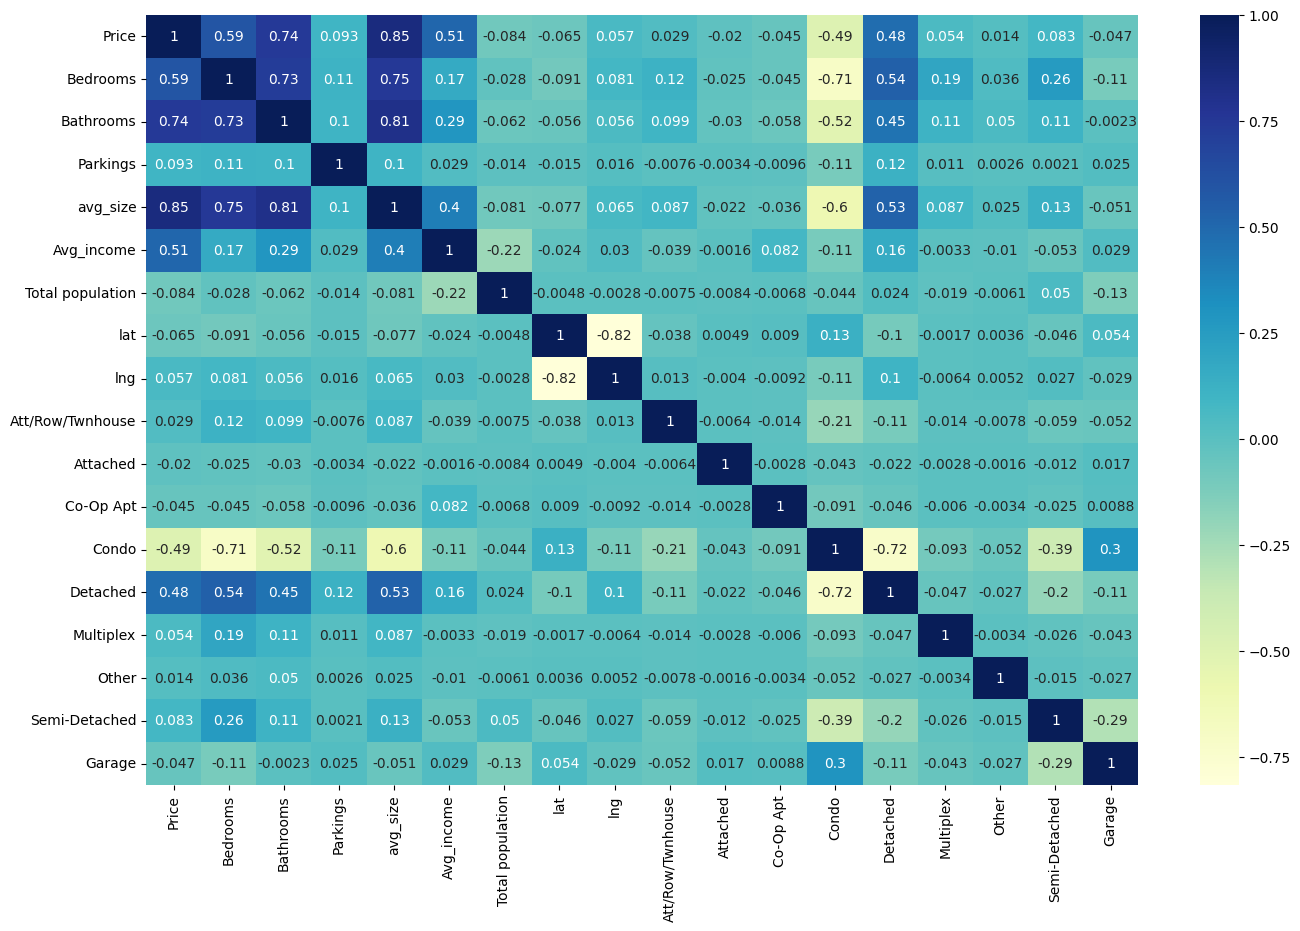

In [33]:
import seaborn as sns

plt.figure(figsize = (16,10))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)

In [34]:
df_copy1 = df_copy

In [35]:
df_log = df_copy

<AxesSubplot: xlabel='lat', ylabel='lng'>

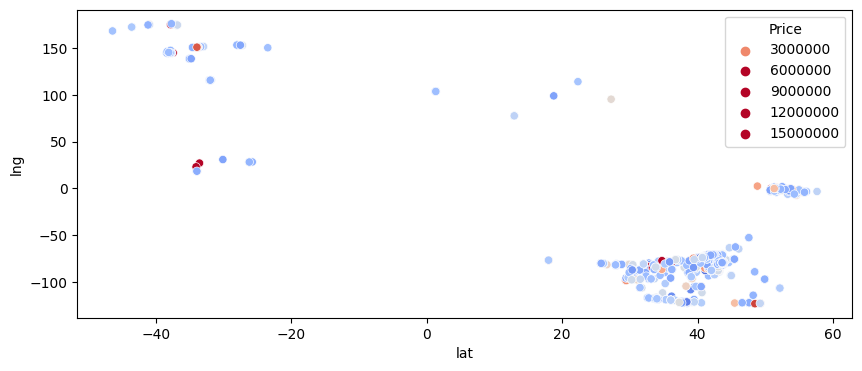

In [36]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='lat', y='lng', data=df_copy, hue_norm=(0, 3800000), hue='Price', palette = 'coolwarm')

#
The above figure shows the the location of the house does not really affect the price of a house, so geographical data isn't important

array([[<AxesSubplot: title={'center': 'Bedrooms'}>,
        <AxesSubplot: title={'center': 'Bathrooms'}>,
        <AxesSubplot: title={'center': 'Price'}>],
       [<AxesSubplot: title={'center': 'Total population'}>,
        <AxesSubplot: title={'center': 'Avg_income'}>,
        <AxesSubplot: title={'center': 'avg_size'}>],
       [<AxesSubplot: title={'center': 'Parkings'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

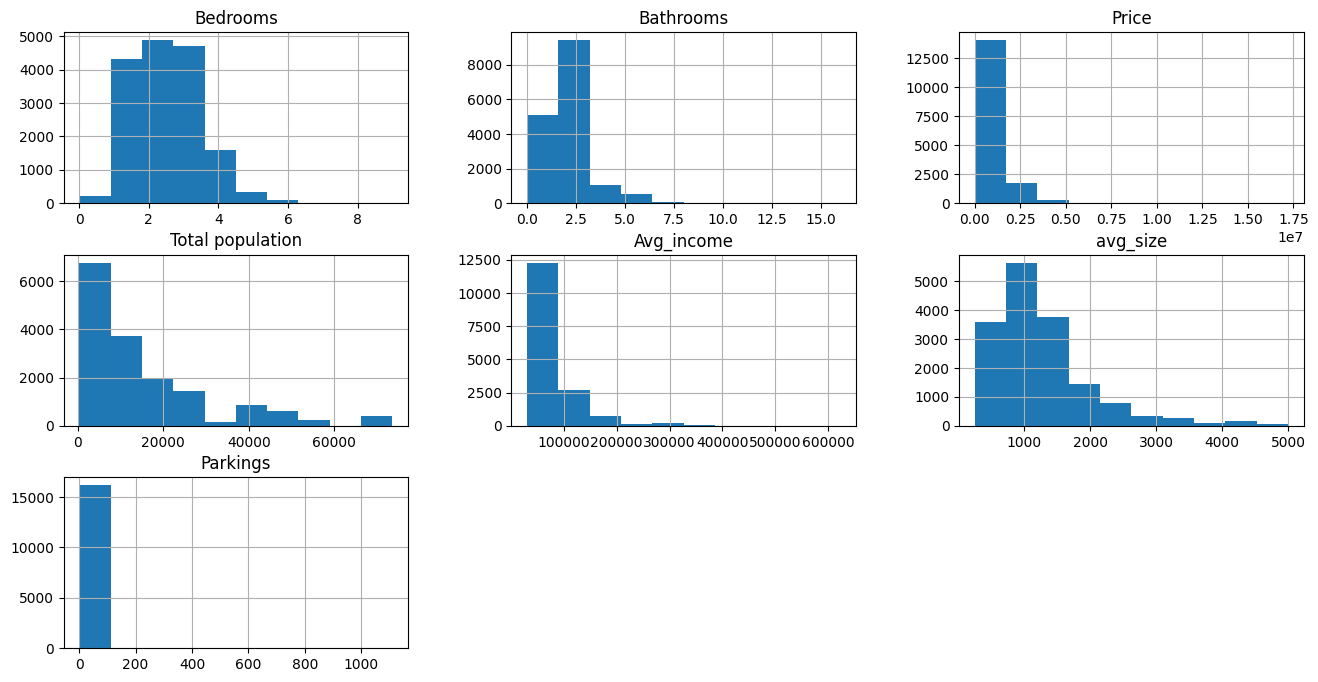

In [37]:
df_log[['Bedrooms', 'Bathrooms', 'Price', 'Total population', 'Avg_income', 'avg_size', 'Parkings']].hist(figsize=(16,8))

#
Seeing that the data is positively skewed, the natural log is applied to the skewed columns, to conserve linearity and help with outlier values.
the machine will be used with both the data with the log applied and the data without, to see which one yields the best results

In [50]:
df_log['Price'] = np.log(df_log['Price'] + 1)
df_log['Bathrooms'] = np.log(df_log['Bathrooms'] + 1)
df_log['Total population'] = np.log(df_log['Total population'] + 1)
df_log['Avg_income'] = np.log(df_log['Avg_income'] + 1)
df_log['Parkings'] = np.log(df_log['Parkings'] + 1)

array([[<AxesSubplot: title={'center': 'Bedrooms'}>,
        <AxesSubplot: title={'center': 'Bathrooms'}>,
        <AxesSubplot: title={'center': 'Price'}>],
       [<AxesSubplot: title={'center': 'Total population'}>,
        <AxesSubplot: title={'center': 'Avg_income'}>,
        <AxesSubplot: title={'center': 'avg_size'}>],
       [<AxesSubplot: title={'center': 'Parkings'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

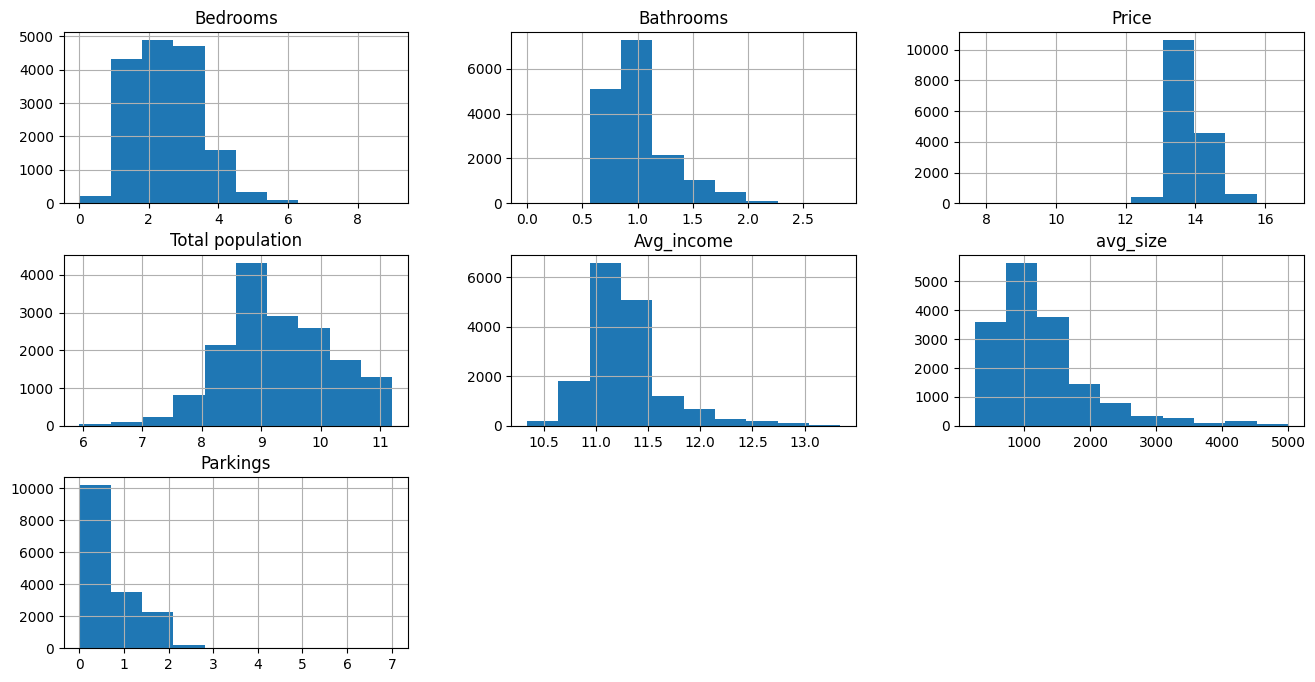

In [51]:
df_log[['Bedrooms', 'Bathrooms', 'Price', 'Total population', 'Avg_income', 'avg_size', 'Parkings']].hist(figsize=(16,8))

In [52]:
x = df_log.drop(['Price'], axis=1)
y = df_log['Price']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
train_log = x_train.join(y_train)

In [55]:
train_log

,Bedrooms,Bathrooms,Parkings,avg_size,Avg_income,Total population,lat,lng,Att/Row/Twnhouse,Attached,Co-Op Apt,Condo,Detached,Multiplex,Other,Semi-Detached,Garage,Price
5423,4.0,1.386294,1.609438,2250.000,12.034649,8.610501,43.654,-79.487,0,0,0,0,1,0,0,0,1,14.470437
13755,4.0,1.098612,1.386294,1917.737,11.953751,9.350798,43.734,-79.408,0,0,0,0,1,0,0,0,1,14.297937
14,3.0,1.386294,2.079442,1493.812,11.173065,7.177782,43.714,-79.545,0,0,0,0,1,0,0,0,1,14.062371
376,0.0,0.693147,0.000000,249.500,11.247370,10.535955,43.670,-79.380,0,0,0,1,0,0,0,0,0,13.138239
11373,2.0,1.098612,0.693147,849.500,11.037660,8.316300,43.767,-79.373,0,0,0,1,0,0,0,0,1,13.679692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2.0,1.098612,0.693147,849.500,11.037660,8.316300,43.767,-79.373,0,0,0,1,0,0,0,0,1,13.843127
3214,2.0,1.098612,0.693147,749.500,10.880704,9.122711,43.772,-79.345,0,0,0,1,0,0,0,0,1,13.604791
16024,1.0,0.693147,0.000000,549.500,10.852342,10.776850,43.671,-79.380,0,0,0,1,0,0,0,0,1,13.358227
13503,2.0,1.386294,1.386294,1041.494,11.037338,8.722254,40.599,-74.283,0,0,0,0,1,0,0,0,0,13.790194


In [56]:
x_train, y_train = train_log.drop(['Price'], axis=1), train_log['Price']

reg_log = LinearRegression()

reg_log.fit(x_train, y_train)

LinearRegression()

In [57]:
test_log = x_test.join(y_test)

x_test, y_test = test_log.drop(['Price'], axis=1), test_log['Price']

In [58]:
reg_log.score(x_test, y_test)

0.8147857393144183

In [59]:
#df_copy.to_csv('edited housing data1.csv', index=False)


In [60]:
#df_log.to_csv('edited with log.csv', index=False)

In [61]:
forest_log = RandomForestRegressor()

forest_log.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
forest_log.score(x_test, y_test)

0.9019158165288794

# Hyperparameter tuning


In [63]:
param_grid = {
    'n_estimators' : [25, 50, 100],
    'max_depth' : [8, 16, 32],
    'min_samples_split' : [4]
}

grid_search = GridSearchCV(forest_log, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 16, 32], 'min_samples_split': [4],
                         'n_estimators': [25, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=16, min_samples_split=4)

In [65]:
best_log_forest = grid_search.best_estimator_

In [66]:
best_log_forest.score(x_test, y_test)

0.9080133871768414

#
The same method will be repeated with the original data to see which data set produces the best results.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

x1 = df_copy1.drop(['Price'], axis=1)
y1 = df_copy1['Price']

In [39]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

In [40]:
train_1 = x_train1.join(y_train1)

In [41]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12934 entries, 14682 to 11826
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bedrooms          12934 non-null  float64
 1   Bathrooms         12934 non-null  float64
 2   Parkings          12934 non-null  float64
 3   avg_size          12934 non-null  float64
 4   Avg_income        12934 non-null  float64
 5   Total population  12934 non-null  float64
 6   lat               12934 non-null  float64
 7   lng               12934 non-null  float64
 8   Att/Row/Twnhouse  12934 non-null  uint8  
 9   Attached          12934 non-null  uint8  
 10  Co-Op Apt         12934 non-null  uint8  
 11  Condo             12934 non-null  uint8  
 12  Detached          12934 non-null  uint8  
 13  Multiplex         12934 non-null  uint8  
 14  Other             12934 non-null  uint8  
 15  Semi-Detached     12934 non-null  uint8  
 16  Garage            12934 non-null  ui

In [42]:
x_train1, y_train1 = train_1.drop(['Price'], axis=1), train_1['Price']

reg_1 = LinearRegression()

reg_1.fit(x_train1, y_train1)

LinearRegression()

In [43]:
test_1 = x_test1.join(y_test1)

x_test1, y_test1 = test_1.drop(['Price'], axis=1), test_1['Price']

In [44]:
reg_1.score(x_test1, y_test1)

0.7981533224571589

In [45]:
forest_1 = RandomForestRegressor()

forest_1.fit(x_train1, y_train1)

RandomForestRegressor()

In [46]:
forest_1.score(x_test1, y_test1)

0.8682717983356669

In [47]:
param_grid = {
    'n_estimators' : [25, 50, 100],
    'max_depth' : [8, 16, 32],
    'min_samples_split' : [4]
}

grid_search1 = GridSearchCV(forest_1, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search1.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 16, 32], 'min_samples_split': [4],
                         'n_estimators': [25, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
best_forest = grid_search1.best_estimator_

In [49]:
best_forest.score(x_test1, y_test1)

0.8655499498614279

# The best results
The data set with the natural log applied to it yields a success rate of approximately 91%, showcasing that logging the data yields better results.